In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


# Definición del Problema

En los últimos años hemos visto un crecimiento exponencial en la venta de videojuegos, aumentando en un 46.43%. Esto nos hizo preguntarnos: ***¿Qué atributos influyen en el desempeño de un videojuego en la industria global?*** En otras palabras ¿Tiene alguna relación las ventas de un videojuego y otros datos considerados (*Platforma*, *Genero*, *Quien lo publica*, ect.)? 

El proposito de este proyecto es para ver si es que podemos predicir el rendimiento (En terminos de ventas globales) de un videojuego teniendo caracteristicas cualitativas.

# Impacto del Trabajo

La industria de los videojuegos es una de las más rentables del mundo. Solo en 2022 se registraron beneficios de [347 billones de dólares](https://www.statista.com/topics/868/video-games/#), lo que la convierte en un negocio aún mayor que el de los [deportes y la música juntos ](https://www.marketwatch.com/story/videogames-are-a-bigger-industry-than-sports-and-movies-combined-thanks-to-the-pandemic-11608654990). Esto se debe a que su popularidad no ha dejado de aumentar a lo largo de los años. En 2022, [Deloitte](https://www2.deloitte.com/us/en/insights/industry/technology/digital-media-trends-consumption-habits-survey/summary.html) realizó una encuesta en la que el 80 % de los estadounidenses afirmaba jugar a videojuegos. 

Esta área del mercado siempre está evolucionando y cambiando para ofrecer productos de mejor calidad y juegos más realistas e inversivos. En el documental [How Video Games Changed the World ](https://www.bing.com/search?q=How+Video+Games+Have+Changed+The+World&FORM=SSQNT1&PC=U531) se explica cómo los videojuegos influyen profundamente en el avance de la tecnología, potenciando la creación de tarjetas gráficas, tarjetas de sonido, aceleradores gráficos, etc.   

Consideramos extremadamente importante intentar predecir el comportamiento de las ventas de videojuegos y tener en cuenta los factores que pueden ayudar o perjudicar la rentabilidad de esta industria. De esta manera, la tecnología podrá adaptarse a los juegos más populares y podremos saber cómo mantener estable una industria tan importante. 

# Datos

El DataSet que vamos a ocupar es una fusión entre dos DataSet que recuperamos de Kaggle que se llaman: [Video Game Sales](https://www.kaggle.com/datasets/gregorut/videogamesales) y [Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

In [42]:
VGSales =  pd.read_csv('DataSets/VGSales.csv')
print('Nuestro dataset tiene:',VGSales.shape[0], 'juegos')
VGSales.isna().sum()

Nuestro dataset tiene: 16598 juegos


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [43]:
VGSalesRatings =  pd.read_csv('DataSets/VideoGameSaleswRatings.csv')
print('En este caso tenemos: ', VGSalesRatings.shape[0], 'juegos')
VGSalesRatings.isna().sum()

En este caso tenemos:  16719 juegos


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

Como la mayor cantidad de NaN que aparecen son por parte del segundo DataSet, así que sería mejor rescatar los datos que nos sirvan de este y quedarnos con el primero como una base para el DataSet.

In [44]:
#Droppeamos los NaN en nuestro dataset de ratings
VGSalesRatings_noNaN = VGSalesRatings.dropna()
#Creamos un nuevo dataset quedandonos con los datos que no estan en el primer DataSet
CleanData = VGSalesRatings_noNaN[['Name', 'Critic_Score', 'Critic_Count','User_Score', 'User_Count', 'Developer','Rating']]


In [45]:
#Unimos los dataset con el mismo nombre
Merge = pd.merge(CleanData, VGSales, on = 'Name')
#Revisamos los NaN que tienen
Merge.isna().sum()

Name              0
Critic_Score      0
Critic_Count      0
User_Score        0
User_Count        0
Developer         0
Rating            0
Rank              0
Platform          0
Year            173
Genre             0
Publisher         4
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Debido a que seguimos contando con NaN creamos unas variables sustitos.

In [46]:
#Como los NaN se pueden arreglar, reemplazamos que los publishers desconocidos son Unknown y los años desconocidos por 0

Final = Merge.assign(Publisher=Merge['Publisher'].fillna('Unknown'))
Final = Final.assign(Year=Merge['Year'].fillna(0))

Final.isna().sum()

Name            0
Critic_Score    0
Critic_Count    0
User_Score      0
User_Count      0
Developer       0
Rating          0
Rank            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [47]:
#Así que la versión final es está
df = Final
df[df.duplicated(subset='Name', keep=False)]

,Name,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,17,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
11,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,24,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
12,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,45,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
13,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,198,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
14,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,1898,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17429,Mortal Kombat: Deadly Alliance,81.0,12.0,8.8,9.0,Criterion Games,M,16566,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01
17430,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,1543,PS4,2014.0,Action,Konami Digital Entertainment,0.45,0.46,0.17,0.20,1.28
17431,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,3267,PS3,2014.0,Action,Konami Digital Entertainment,0.14,0.14,0.27,0.06,0.62
17432,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,6120,XOne,2014.0,Action,Konami Digital Entertainment,0.15,0.11,0.00,0.02,0.28


# Análisis Exploratorio de los Datos

In [48]:
Final.columns

Index(['Name', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count',
       'Developer', 'Rating', 'Rank', 'Platform', 'Year', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

Tenemos 17 columnas ('Name', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count','Developer', 'Rating', 'Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' y 'Global_Sales') para 17436 juegos. 

In [49]:
Final[Final.duplicated(subset='Name', keep=False)]


,Name,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
10,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,17,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
11,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,24,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
12,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,45,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
13,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,198,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
14,Grand Theft Auto V,97.0,50.0,8.2,3994.0,Rockstar North,M,1898,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17429,Mortal Kombat: Deadly Alliance,81.0,12.0,8.8,9.0,Criterion Games,M,16566,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01
17430,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,1543,PS4,2014.0,Action,Konami Digital Entertainment,0.45,0.46,0.17,0.20,1.28
17431,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,3267,PS3,2014.0,Action,Konami Digital Entertainment,0.14,0.14,0.27,0.06,0.62
17432,Metal Gear Solid V: Ground Zeroes,80.0,20.0,7.6,412.0,Kojima Productions,M,6120,XOne,2014.0,Action,Konami Digital Entertainment,0.15,0.11,0.00,0.02,0.28


Vemos que aunque hay nombres repetidos, tiene distintas consolas, ranking y ventas, las cuales nos sirven para nuestra predicción.

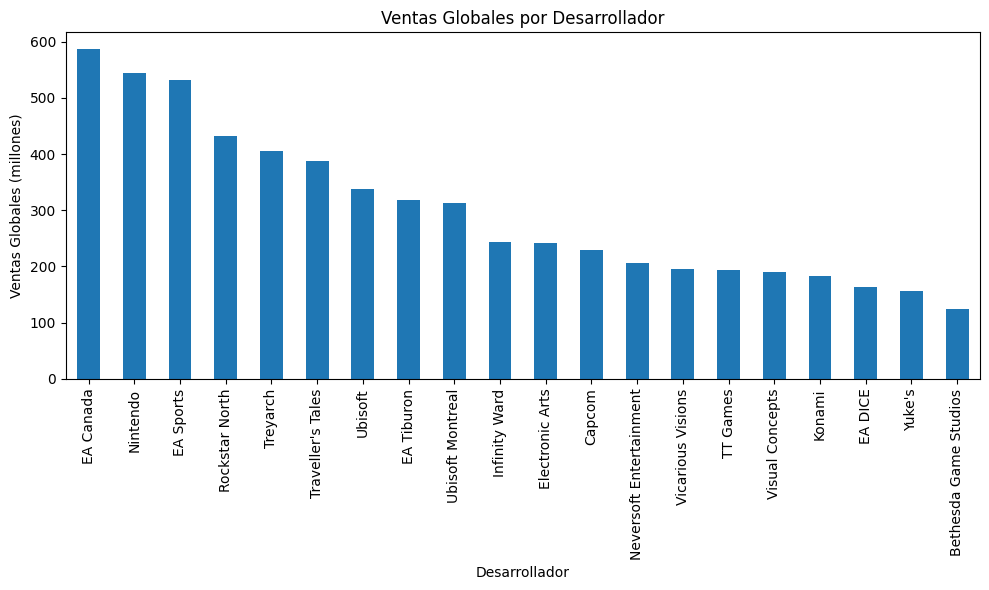

In [50]:
grouped_sales = df.groupby('Developer')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Desarrollador')
plt.xlabel('Desarrollador')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

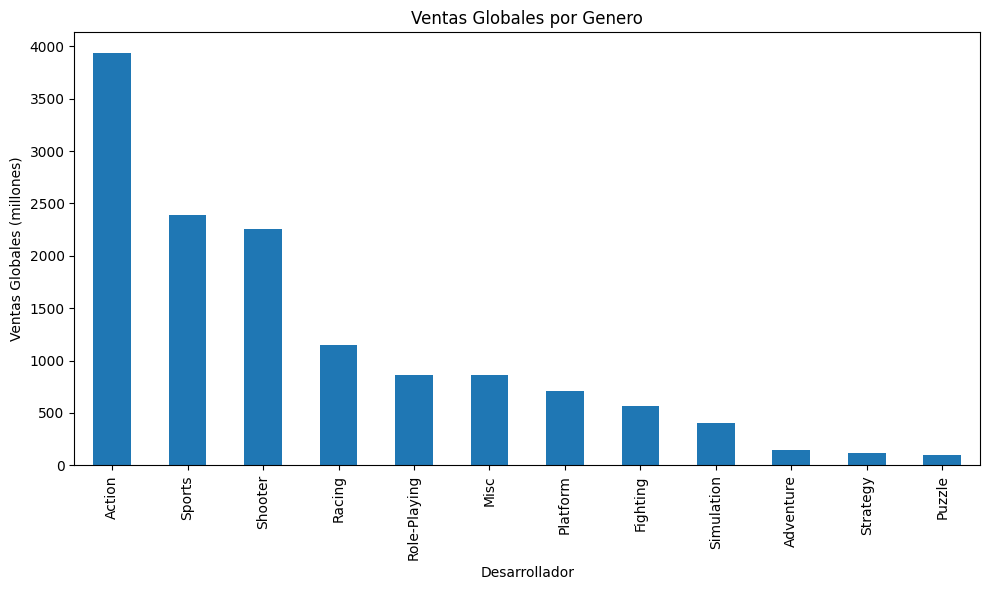

In [51]:
grouped_sales = df.groupby('Genre')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Genero')
plt.xlabel('Genero')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

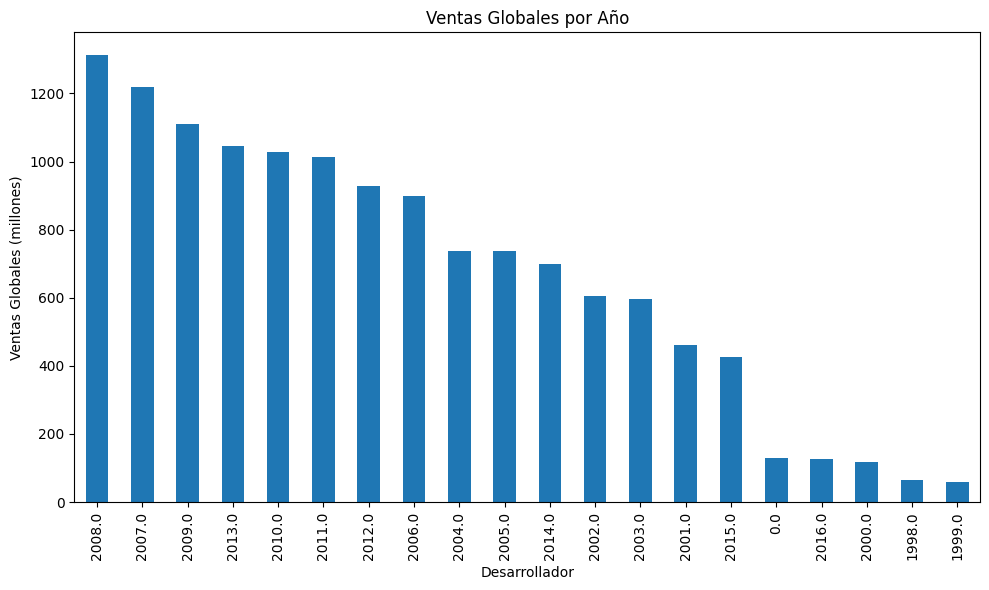

In [52]:
grouped_sales = df.groupby('Year')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Año')
plt.xlabel('Desarrollador')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

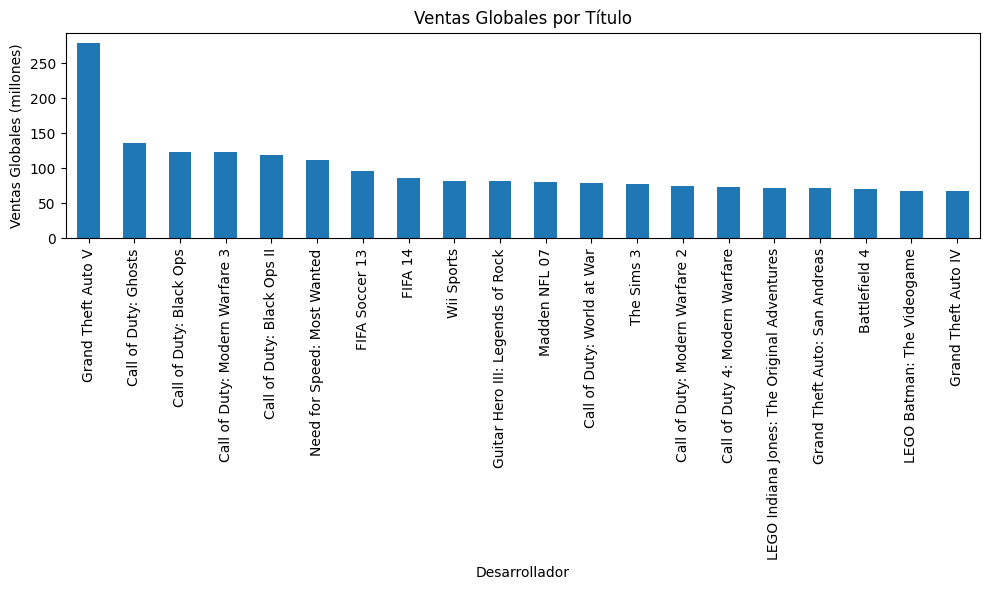

In [53]:
grouped_sales = df.groupby('Name')['Global_Sales'].sum()
grouped_sales = grouped_sales.sort_values(ascending=False).head(20)

# Crear el gráfico
plt.figure(figsize=(10, 6))
grouped_sales.plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Ventas Globales por Título')
plt.xlabel('Desarrollador')
plt.ylabel('Ventas Globales (millones)')

# Mostrar el gráfico
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Podemos ver a simple vista que las variables de Nombre, año, genero y desarrollador tienen un impacto en las ventas de los videojuegos, luego estas variables pueden ser relevantes al momento de elegir variable para un modelo.

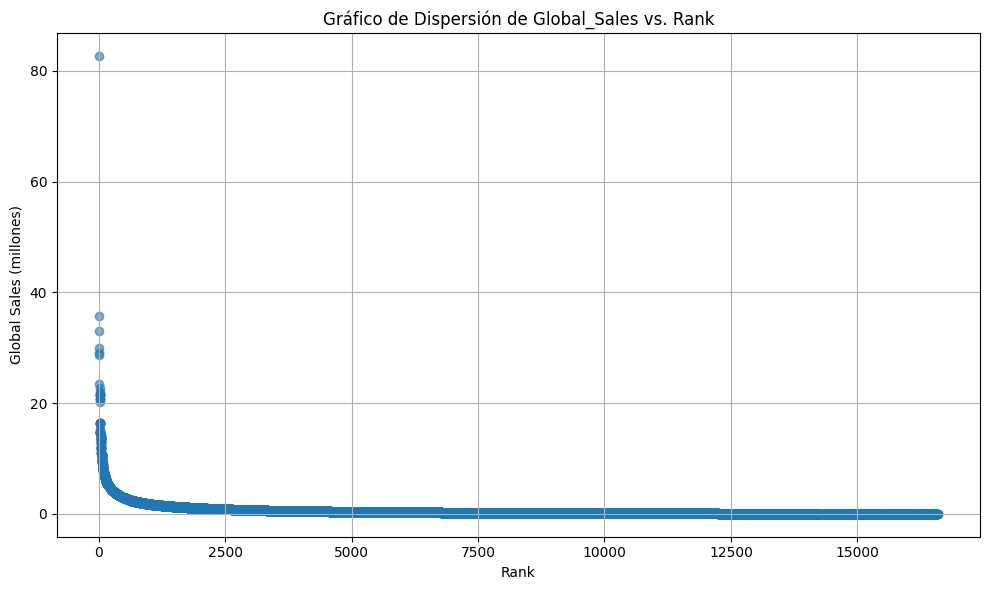

In [54]:
# Asegúrate de que 'Rank' y 'Global_Sales' son numéricos
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

# Eliminar filas con NaN en las columnas relevantes (opcional)
df = df.dropna(subset=['Rank', 'Global_Sales'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Rank'], df['Global_Sales'], alpha=0.6)

# Añadir títulos y etiquetas
plt.title('Gráfico de Dispersión de Global_Sales vs. Rank')
plt.xlabel('Rank')
plt.ylabel('Global Sales (millones)')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos ver una gran concentración de ventas en los quantiles más altos en el ranking, lo cual puede significar que posteriormente estos valores extremos generen problemas al ajustar modelos.

In [55]:

df[df['Name'] == "Minecraft"]

,Name,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Podemos ver que el dataset final aún no cuenta con juegos importantes

La información disponible es:

* Rank - Ranking de ventas generales
* Nombre: el nombre del juego.
* Plataforma: plataforma de lanzamiento del juego (es decir, PC, PS4, etc.)
* Año: año de lanzamiento del juego.
* Género - Género del juego
* Editor - Editor del juego
* NA_Sales - Ventas en Norteamérica (en millones)
* EU_Sales - Ventas en Europa (en millones)
* JP_Sales - Ventas en Japón (en millones)
* Other_Sales - Ventas en el resto del mundo (en millones)
* Global_Sales: ventas totales a nivel mundial.

La información faltante podría ser:
* Datos de soporte - Tiempo de soporte del juego
* Jugadores activos
* Contenido adicional disponible (DLC)
* Es parte de una franquicia 
* Precio individual
* Inversión en desarrollo 

# Primera Respuesta al Problema o Pregunta
- ¿Por qué era adecuado el trabajo realizado para mi proyecto?

Al combinar datasets que contienen información relacionada podemos obtener una visión más completa del fenomeno que queremos analizar. En este caso encontramos dos datasets bastante parecidos, por lo que fue simple juntarlos en una sola tabla con mayor cantidad de columnas, lo que facilita el analisis posterior que haremos.
Los valores nulos representan la ausencia de información, lo que si no se trabajan bien, puede implicar un cambio en los resultados obtenidos. 

Siempre es bueno filtrar y manejar los datos nulos para asegurar la integridad de nuestro analisis.


Finalmente, nunca es malo mostrar simples gráficos para poder un poco más de contexto antes de hacer procedimientos más complejos.

- ¿Qué limitaciones tiene mi análisis? ¿Cómo se podría mejorar o solventar algunas de esas limitaciones?

El análisis de dato realizado fue un análisis general de los datos, esto quiere decir que no se tomó en cuenta ningún dato particular para el análisis sino que se intentó visualizar el dataset general. En consecuencia, existen detalles más particulares que no fueron tomados en cuenta para el análisis. Un segundo análisis que tome en cuenta elementos particulares del dataset sería beneficioso.

Por otro lado, dentro del análisis se le da relevancia a los valores máximos de ventas globales, pero dentro del gráfico de ventas y ranking se puede ver que las ventas están concentradas mayormente en una fracción de los videojuegos, luego un análisis detallado de los puntos medios entregaría más información de la media de los datos.

- ¿Necesito más datos para mi proyecto?

La cantidad de datos que tenemos es suficiente para poder aplicar modelos sobre los mismos, tener más de 15.000 filas con 17 columnas es una cantidad considerable de información que permite separar el dataset en entrenamiento y test para poder comprobar la efectividad de las herramientas utilizadas.
Un problema a tener en cuenta rádica en el filtro de datos que aplicamos a los datos nulos, por ejemplo, notamos que no tenemos el videojuego Minecraft, el cual es un juego importante en terminos de ventas y por tanto muestra falencias en los dataframe final.


- ¿Necesito más análisis para mi proyecto?

Creemos que un análisis más detallado y profundo en secciones particulares del proyecto aportaría información. Pese a esto, la información obtenida con este análisis inicial es suficiente para tener una idea en terminos generales de la data obtenida en distintos aspectos de relevancia para elegir como debe enfocarse el proyecto en primera instancia. A medida que se desarrollen disntintas herramientas será positivo analizar aspectos relevantes para la misma.